# Ch2.머신러닝 프로젝트 처음부터 끝까지

2장에서는 예제 프로젝트를 처음부터 끝까지 진행한다. 진행할 주요 단계는 다음과 같다.

#### 1. 큰 그림을 본다.  
#### 2. 데이터를 구한다.  
#### 3. 데이터로부터 인사이트를 얻기 위해 데이터를 탐색하고 시각화한다.  
#### 4. 머신러닝 알고리즘을 위해 데이터를 준비한다.  
#### 5. 모델을 선택하고 훈련시킨다.  
#### 6. 모델을 미세 튜닝한다.  
#### 7. 솔루션을 제시한다.  
#### 8. 시스템을 런칭하고, 모니터링하고, 유지 보수한다.  

---

## 2.1 실제 데이터로 작업하기

머신러닝을 배울 땐 인공적으로 만들어진 데이터셋이 아닌 실제 데이터셋으로 실험해보는 것이 가장 좋으며 여러 분야에 걸쳐 공개된 데이터셋이 아주 많다. 다음은 데이터를 구하기 좋은 저장소 목록이다.

- 유명한 공개 데이터 저장소  
[OpenML](https://openml.org/)  
[Kaggle](https://www.kaggle.com/)  
[PapersWithCode](https://paperswithcode.com/)  
[US Irvine Machine Learning Repository](https://archive.ics.uci.edu/)  
[TesorFlow Dataset](https://www.tensorflow.org/datasets?hl=ko)  
  
- 메타 포털(공개 데이터 저장소 나열되어 있는 페이지)  
[Data Portals](https://dataportals.org/)  
[Open Data monitor](https://project.opendatamonitor.eu/)

이 장에서는 Carnegie Mellon 대학교의 통계학과에서 운영하는 공개 데이터셋 저장소 [StatLib](https://lib.stat.cmu.edu/datasets/)의 캘리포니아 주택 가격 데이터셋을 사용한다. 해당 데이터셋은 1990년 캘리포니아 인구 조사 데이터를 기반으로 한다.

---

## 2.2 큰 그림 보기

먼저 캘리포니아 인구 조사 데이터를 사용해 캘리포니아 주택 가격 모델을 만든다. 이 데이터는 캘리포니아의 블록 그룹(block group)마다 인구(population), 중간 소득(median income), 중간 주택 가격(median housing price) 등의 정보를 담고 있다. 블록 그룹은 미국 인구 조사국에서 샘플 데이터를 발표하는 데 사용한 최소한의 지리적 단위이며 하나의 블록 그룹은 보통 600~3000명의 인구를 나타낸다. 여기서는 간단하게 구역이라고 부른다.  
이 데이터로 모델을 학습시켜 다른 측정 데이터가 주어졌을 때 구역의 중간 주택 가격을 예측해야 한다.

### 문제 정의

가장 먼저 '비즈니스의 목적이 정확히 무엇인가?'에 대해 파악해야 한다. 모델을 만드는 것이 최종 목적이 아닐 것이다. 회사에서는 모델을 사용해 이익을 얻으려고 할 것이다. 목적을 아는 것은 문제를 어떻게 구성할지, 어떤 알고리즘을 선택할지, 모델 평가에 어떤 성능 지표를 사용할지, 모델 튜닝을 위해 얼마 만큼의 노력을 투여할지 결정하기 때문에 아주 중요하다.

해당 모델의 출력(구역 중간 주택 가격에 대한 예측)이 여러 가지 다른 **신호**와 함께 다른 머신러닝 시스텀에 입력으로 사용된다고 하자. 뒤따르는 시스템은 해당 지역에 투자할 가치가 있는지 결정한다. 이 결정이 수익과 직결되기 때문에 올바르게 예측하는 것은 매우 중요하다.

<center>

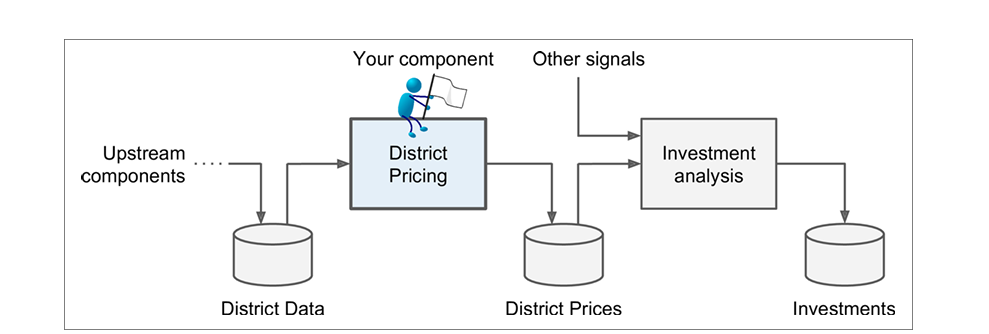

</center>

<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 파이프라인</strong><br>
    데이터 처리 <b>컴포넌트</b>들이 연속되어 있는 것을 데이터 <b>파이프라인</b>라고 한다. 머신러닝 시스템은 데이터를 조작하고 변환할 일이 많아 파이프라인을 사용하는 일이 매우 흔하다.<br>
    보통 컴포넌트들은 비동기적으로 작동한다. 각 컴포넌트는 많은 데이터를 추출해 처리하고 그 결과를 다른 데이터 저장소로 보낸다. 그러면 일정 시간이 지난 후 파이프라인의 다음 컴포넌트가 그 데이터를 추출해 자신의 출력 결과를 만든다. 각 컴포넌트는 완전히 독립적이다. 즉, 컴포넌트 사이의 인터페이스는 데이터 저장소 뿐이다. 이는 시스템을 이해하기 쉽게 만들고, 각 팀은 각자의 컴포넌트에 집중할 수 있게 만들어준다. 한 컴포넌트가 중단되더라도 하위 컴포넌트는 문제가 생긴 컴포넌트의 마지막 출력을 사용해 평상시와 같이 계속 작동할 수 있다. 따라서 시스템이 매우 견고해진다.<br>
    한편 모니터링이 적절히 되지 않으면 고장 난 컴포넌트를 한동안 모를 수 있다. 데이터가 만들어진 지 오래되면 전체 시스템의 성능이 떨어진다.
</div>

다음으로 '현재 솔루션이 어떻게 구성되어 있나?'에 대한 생각을 해야 한다. 현재 상황은 문제 해결 방법에 관한 정보를 제공할 뿐만 아니라 참고 성능으로도 사용할 수 있다. 현재는 구역 주택 가격을 전문가가 수동으로 추정한다고 한다고 하자. 한 팀이 구역에 관한 최신 정보를 모으고 있는데 중간 주택 가격을 얻을 수 없을 때는 복잡한 규칙을 사용하여 추정한다고 한다.  
이 방법은 비용과 시간이 많이 들고 추정 결과도 썩 좋지 않다. 실제 중간 주택 가격을 구해보면 팀에서 추정한 것이 30% 이상 벗어났음을 알게 될 때가 많다. 따라서 회사는 구역의 데이터를 기반으로 중간 주택 가격을 예측하는 모델을 훈련시키는 것이 더 유용하다고 생각한다. 인구 조사 데이터는 다른 데이터를 비롯하여 수천 개 구역의 중간 주택 가격을 포함하므로 이 작업이 매우 적합한 데이터셋일 것이다.  
이제 이런 정보들을 바탕으로 시스템을 설계할 준비가 되었다. 먼저 모델 훈련에 어떤 지도 방식이 필요한지 결정해야 한다. 집값이니 회귀 문제이며, 빠르게 변하는 데이터에 적응할 필요가 없다하고 일반적인 배치 학습을 통해 모델을 학습한다.

<div style="border: 2px solid rgb(233, 224, 222); padding: 10px; background-color: rgb(233, 224, 222); margin: 10px 0;">
    <strong style="font-weight: bold;">● 대용량 데이터 모델 학습</strong><br>
    데이터가 매우 크면 <b>Map reduce</b> 기술을 사용하여 배치 학습을 여러 서버로 분할하거나 온라인 학습 기법을 사용할 수 있다. Map reduce가 구현된 대표적인 프레임워크로 Apache Hadoop 프로젝트가 있다. 하둡을 사용하여 직접 회귀 분석을 구현할 수 있지만, 일반적으로 Map reduce에는 Spark을 사용하는 것이 편리하고 성능도 뛰어나다.
</div>

### 성능 측정 지표 선택

다음 단계로 성능 측정 지표를 선택해야 한다. 먼저 몇가지 표기법(notation)에 대해 설명한다.

- $m$은 데이터셋에 있는 샘플 수이다. 2000개 구역의 데이터가 있다면, $m=2000$이다.  

- $X^{(i)}$는 데이터셋에 있는 $i$번째 샘플(레이블 제외)의 전체 특성값의 벡터이며, $y^{(i)}$는 해당 레이블이다.  
예를 들어 데이터셋에 있는 첫 번째 구역이 경도 -118.29˚, 위도 33.91˚에 위치하고, 중간 소득이 $38372이며, 주민이 1416명, 중간 주택 가격이 $156400라면 $X^{(1)}$과 $y^{(i)}$는 다음과 같다.
$$
X^{(1)}=\begin{bmatrix}
-118.29 \\
33.91 \\
1416 \\
38372\end{bmatrix}
$$
$$
y^{(1)}=156400
$$

- $X$는 데이터셋에 있는 모든 샘플은 모든 설명변수값(레이블 제외)를 포함하는 행렬이다. 샘플 하나가 하나의 행이어서 $i$번째 행은 $X^{(i)}$의 전치와 같고, $(X^{(i)})^T$로 표기한다.  
예를 들어 첫 번째 구역이 앞의 예와 같다면 행렬 $X$는 다음과 같다.
$$
X=\begin{bmatrix}
(X^{(1)})^T \\
(X^{(2)})^T \\
\vdots  \\
(X^{(1999)})^T \\

(X^{(2000)})^T\end{bmatrix}=
\begin{bmatrix}
-118.29 & 33.91 & 1416 & 38372 \\
\vdots  & \vdots  & \vdots  & \vdots 
\end{bmatrix}
$$

- $h$는 시스템의 예측 함수이며 **가설(hypothesis)** 이라고 한다. 시스템이 하나의 샘플 특성 벡터 $X^{(i)}$를 받으면 그 샘플에 대한 예측값 $\hat{y}^{(i)}=h(X^{(i)})$를 출력한다.  

- $RMSE(X,h)$는 가설 $h$를 사용하여 일련의 샘플을 평가하는 비용 함수이다.  

회귀 문제의 전형적인 성능 지표는 **평균 제곱 오차(Mean Squared Error, MSE)** 이다. 오차가 커질수록 이 값은 더욱 커지므로 예측에 얼마나 많은 오차가 있는지 가늠하게 해준다.
$$
RMSE(X,h)=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(X^{(i)})-y^{(i)})^2}
$$
RMSE 계산은 **유클리드 노름(Euclidean norm)** 에 해당한다. $l_2$ norm이라고도 부르며 $\left\| \cdot  \right\|_2$ 또는 그냥 $\left\| \cdot  \right\|$로 표시한다.  

RMSE는 일반적으로 회귀 문제에서 선호되는 성능 측정 방법이지만 경우에 따라 다른 함수를 사용할 수도 있다. 예를 들어 이상치로 보이는 구역이 많다면 **평균 절대 오차(Mean Absolute Error,MAE)** 를 고려할 수 있다.
$$
MAE(X,h)=\frac{1}{m}\sum_{i=1}^{m}\left| h(X^{(i)})-y^{(i)} \right|
$$
절댓값의 합을 계산하는 것은 $l_1$ norm에 해당하며 $\left\| \cdot  \right\|_1$로 표기한다. 이는 도시의 구획이 직각으로 나뉘어 있을 때 도시의 두 지점 사이의 거리를 측정하는 것과 같아 **맨해튼 노름(Manhatten norm)** 이라고도 한다.

일반적으로 원소가 $n$개인 벡터 $v$의 $l_k$ norm은 $\left\| v \right\|_k =(\left| v_0 \right|^k+\left| v_1 \right|^k+\cdots +\left| v_n \right|^k)^\frac{1}{k}$로 정의한다. $l_0$은 단순히 벡터에 있는 0이 아닌 원소의 수이고, $l_\infty $는 벡터에서 가장 큰 절댓값이 된다.

노름의 지수가 클수록 큰 값의 원소에 치우치며 작은 값은 무시된다. 그래서 RMSE가 MAE보다 조금 더 이상치에 민감하다. 하지만 이상치가 매우 드물면 RMSE가 잘 맞아 일반적으로 널리 사용된다.

### 가정 검사

마지막으로 지금까지 만든 가정을 나열하고 검사해봐야 한다. 이 과정에서 심각한 문제를 일찍 발견할 수도 있기 때문이다. 예를 들어, 시스템이 출력한 구역의 가격이 그대로 다음 머신러닝 시스템의 입력으로 사용될 거라 가정했는데, 하위 시스템에서 이 값을 ('저가','보통','고가' 같은) 카테고리로 바꾸고 가격 대신 카테고리를 사용하면 정확한 가격을 구하는 것이 전혀 중요하지 않으며 올바른 카테고리를 구하는 시스템이 필요하다.

---

## 2.3 데이터 가져오기